# Analyzing my data science articles

- My [Medium Blog](https://medium.com/@niranjankumarc)
- [Marktechpost Blog](https://www.marktechpost.com/author/niranjan-kumar/)

- First Scrape all the links to the articles from the profile page
- Next, scrape the content of all the articles for analysis

## Import Dependencies

In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import pandas as pd

## Scrape Medium Articles

In [2]:
#Profile link 

medium_profile_link = "https://medium.com/@niranjankumarc"
marktech_profile_link = "https://www.marktechpost.com/author/niranjan-kumar/"

In [3]:
#creating a variable

medium_url = requests.get(medium_profile_link)

In [4]:
#check the status 

medium_url.status_code

200

> Medium has dynamic web pages that load content using javascript. So we will be using `webdriver` from selenium to scrape the content.

Download the chrome executable from [here](https://sites.google.com/a/chromium.org/chromedriver/home)

In [5]:
#create the driver for chrome browser with executable.

driver = webdriver.Chrome(executable_path = 'C:\\Users\\NiranjanKumar\\Downloads\\chromedriver.exe')

In [6]:
#load the webpage and scroll till the bottom of the page
driver.get(medium_profile_link)

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(30)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [7]:
#get the html content of the page

html = driver.page_source

In [8]:
#create a soup object

medium_soup = BeautifulSoup(html)

print(medium_soup.prettify())

<html data-rh="lang" lang="en">
 <head>
  <script async="" src="https://cdn.branch.io/branch-latest.min.js">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js">
  </script>
  <script>
   !function(c,f){var t,o,i,e=[],r={passive:!0,capture:!0},n=new Date,a="pointerup",u="pointercancel";function p(n,e){t||(t=e,o=n,i=new Date,w(f),s())}function s(){0<=o&&o<i-n&&(e.forEach(function(n){n(o,t)}),e=[])}function l(n){if(n.cancelable){var e=(1e12<n.timeStamp?new Date:performance.now())-n.timeStamp;"pointerdown"==n.type?function(n,e){function t(){p(n,e),i()}function o(){i()}function i(){f(a,t,r),f(u,o,r)}c(a,t,r),c(u,o,r)}(e,n):p(e,n)}}function w(e){["click","mousedown","keydown","touchstart","pointerdown"].forEach(function(n){e(n,l,r)})}w(c),self.perfMetrics=self.perfMetrics||{},self.perfMetrics.onFirstInputDelay=function(n){e.push(n),s()}}(addEventListener,removeEventListener)
  </script>
  <title>
   Niranjan Kumar – Medium
  </title>
  <meta charset="utf-8" da

## Extract all the links to the articles
1. Find all the `div` tags with class - `r s y`.
2. Find `a` tags with in `div` tags.

In [9]:
#finding the divs

soup_divs = medium_soup.findAll("div", {'class' : 'r s y'})
soup_divs[:2]

[<div class="r s y"><a href="https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e?source=---------2------------------" rel="noopener"><div><div class="z ac fq fr fs ft"></div><section class="fu fv fw fx fy"><figure class="fz ga paragraph-image"><div class="gb"><div class="gg y gh gi"><div class="gj y"><div class="gc gd z ab ac fd v fk ge gf"><img class="z ab ac fd v gk gl aw ib" height="210" role="presentation" src="https://miro.medium.com/max/38/1*zLm6DhiX0IaENvk_MFVkCA.png?q=20" width="700"/></div><img class="hz ia z ab ac fd v gn" height="210" role="presentation" src="https://miro.medium.com/fit/c/875/263/1*zLm6DhiX0IaENvk_MFVkCA.png" width="700"/><noscript></noscript></div></div></div></figure><div><h1 class="go gp cs bo bn cu gq gr gs" id="ccb2">Visualizing Convolution Neural Networks using Pytorch</h1></div></section></div></a></div>,
 <div class="r s y"><a href="https://towardsdatascience.com/introduction-to-encoder-decoder-models-eli

In [10]:
title_lst = []
links_lst = []

for each_div in soup_divs:
    
    article_link = each_div.find("a").get("href").split("?")[0]
    article_title = each_div.find("a").find("h1").text.strip()
    
    if article_link.startswith("https") == False:
        article_link = "https://medium.com" + article_link #appending the address for links (eg. hackernoon: moved out of medium)
    
    #append the values to list
    title_lst.append(article_title)
    links_lst.append(article_link)
    


In [11]:
#check the count of title and links

print(len(title_lst), len(links_lst))

25 25


In [12]:
#close the connection
driver.quit()

## Scrape Marktechpost Articles

- Since this webpage is a static page, we will use normal `requests` library to scrape data.

In [13]:
#creating a variable
mark_url = requests.get('https://www.marktechpost.com/author/niranjan-kumar/')

In [14]:
#get the status code
mark_url.status_code

200

In [15]:
mark_soup = BeautifulSoup(mark_url.content)
print(mark_soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.marktechpost.com/xmlrpc.php" rel="pingback"/>
  <title>
   Niranjan Kumar, Author at MarkTechPost
  </title>
  <link href="https://www.marktechpost.com/wp-content/uploads/2017/06/Untitled-design-3-300x300.png" rel="icon" type="image/png"/>
  <!-- This site is optimized with the Yoast SEO Premium plugin v13.2 - https://yoast.com/wordpress/plugins/seo/ -->
  <meta content="Niranjan Kumar works as a Risk Analytics and Modeling Intern at HSBC. Prior to joining HSBC, Niranjan worked as Computer Vision Intern at Nemmadi.in. While there, he has created an end-to-end object detection application to identify defects at the construction site based on photographs. Niranja

In [16]:
#iterate the articles and get the links and titles

for eachitem in mark_soup.findAll("a", {'rel': 'bookmark'}):
    
    title_lst.append(eachitem.get("title"))
    links_lst.append(eachitem.get("href"))

In [17]:
#create a dataframe

titles_df = pd.DataFrame(list(zip(title_lst, links_lst)), columns = ["Title", "URL"])
titles_df.head()

,Title,URL
0,Visualizing Convolution Neural Networks using ...,https://towardsdatascience.com/visualizing-con...
1,Introduction to Encoder-Decoder Models — ELI5 Way,https://towardsdatascience.com/introduction-to...
2,Long Short Term Memory and Gated Recurrent Uni...,https://towardsdatascience.com/long-short-term...
3,My Guest Blogs on Data Science Published in 2019,https://medium.com/@niranjankumarc/my-guest-bl...
4,Recurrent Neural Networks (RNN) Explained — th...,https://towardsdatascience.com/recurrent-neura...


- Removing the duplicates

In [18]:
titles_df = titles_df.drop_duplicates().reset_index(drop = True)
titles_df.head()

,Title,URL
0,Visualizing Convolution Neural Networks using ...,https://towardsdatascience.com/visualizing-con...
1,Introduction to Encoder-Decoder Models — ELI5 Way,https://towardsdatascience.com/introduction-to...
2,Long Short Term Memory and Gated Recurrent Uni...,https://towardsdatascience.com/long-short-term...
3,My Guest Blogs on Data Science Published in 2019,https://medium.com/@niranjankumarc/my-guest-bl...
4,Recurrent Neural Networks (RNN) Explained — th...,https://towardsdatascience.com/recurrent-neura...


## Extract content from links

In [19]:
import html2text

h = html2text.HTML2Text()

#ignoring all the links, tables and images in the blog
h.ignore_links = True
h.ignore_images = True
h.ignore_tables = True

In [20]:
content_lst = []

#iterating through all the links 
for ind in titles_df.index: 
    
    #content request object
    request_content = requests.get(titles_df["URL"][ind])
    
    main_content = h.handle(str(request_content.content)) #get the text from the html content
    
    content_lst.append(str(main_content))

In [21]:
#number of contents fetched

len(content_lst)

29

In [22]:
#add the new column

titles_df["content"] = content_lst
titles_df.head()

,Title,URL,content
0,Visualizing Convolution Neural Networks using ...,https://towardsdatascience.com/visualizing-con...,b'\n\nSign in\n\n * Data Science\n * Machine...
1,Introduction to Encoder-Decoder Models — ELI5 Way,https://towardsdatascience.com/introduction-to...,b'\n\nSign in\n\n * Data Science\n * Machine...
2,Long Short Term Memory and Gated Recurrent Uni...,https://towardsdatascience.com/long-short-term...,b'\n\nSign in\n\n * Data Science\n * Machine...
3,My Guest Blogs on Data Science Published in 2019,https://medium.com/@niranjankumarc/my-guest-bl...,b'\n\nBecome a member\n\nSign in\n\n# My Guest...
4,Recurrent Neural Networks (RNN) Explained — th...,https://towardsdatascience.com/recurrent-neura...,b'\n\nSign in\n\n * Data Science\n * Machine...


## Data Cleaning

In [23]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
import re
import string

In [24]:
def remove_links(text):    
    return re.sub(r'https?://[^\s]+', '', text)

In [25]:
# 1. Remove all the links if present in the content

titles_df["content"] = titles_df.content.apply(lambda content: remove_links(content))
titles_df.head()

,Title,URL,content
0,Visualizing Convolution Neural Networks using ...,https://towardsdatascience.com/visualizing-con...,b'\n\nSign in\n\n * Data Science\n * Machine...
1,Introduction to Encoder-Decoder Models — ELI5 Way,https://towardsdatascience.com/introduction-to...,b'\n\nSign in\n\n * Data Science\n * Machine...
2,Long Short Term Memory and Gated Recurrent Uni...,https://towardsdatascience.com/long-short-term...,b'\n\nSign in\n\n * Data Science\n * Machine...
3,My Guest Blogs on Data Science Published in 2019,https://medium.com/@niranjankumarc/my-guest-bl...,b'\n\nBecome a member\n\nSign in\n\n# My Guest...
4,Recurrent Neural Networks (RNN) Explained — th...,https://towardsdatascience.com/recurrent-neura...,b'\n\nSign in\n\n * Data Science\n * Machine...


In [26]:
# 2. Join all the contents in the dataframe using "\n\n" and make it a single string

main_content_string =  "\n\n".join(titles_df.content)
main_content_string[ :300]

"b'\n\nSign in\n\n  * Data Science\n  * Machine Learning\n  * Programming\n  * Visualization\n  * AI\n  * Picks\n  * More\n  * Contribute\n\n# Visualizing Convolution Neural Networks using Pytorch\n\nNiranjan Kumar\n\nFollow\n\nOct 12, 2019 \\xc2\\xb7 12 min read\n\nPhoto by Karsten W\\xc3\\xbcrth (@karsten.wuerth) on Unspla"

In [27]:
# 2. Remove all whitespaces (\n and \t) with space

main_content_string = re.sub('\s+',' ',main_content_string).strip()
main_content_string[:300]

"b' Sign in * Data Science * Machine Learning * Programming * Visualization * AI * Picks * More * Contribute # Visualizing Convolution Neural Networks using Pytorch Niranjan Kumar Follow Oct 12, 2019 \\xc2\\xb7 12 min read Photo by Karsten W\\xc3\\xbcrth (@karsten.wuerth) on Unsplash **Convolution Neural"

In [28]:
# 3. Remove contractions - short text

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
main_content_string = replace_contractions(main_content_string)

In [29]:
# 4. Remove punctuation

main_content_string = main_content_string.translate(str.maketrans('', '', string.punctuation))
main_content_string = main_content_string.replace("‘", '').replace("’", '').replace("'", '')
main_content_string[:300]

'b Sign in  Data Science  Machine Learning  Programming  Visualization  AI  Picks  More  Contribute  Visualizing Convolution Neural Networks using Pytorch Niranjan Kumar Follow Oct 12 2019 xc2xb7 12 min read Photo by Karsten Wxc3xbcrth karstenwuerth on Unsplash Convolution Neural Network CNN is anoth'

In [30]:
# 5. Lowercase 

main_content_string = main_content_string.lower().strip("b").strip()
main_content_string[:300]

'sign in  data science  machine learning  programming  visualization  ai  picks  more  contribute  visualizing convolution neural networks using pytorch niranjan kumar follow oct 12 2019 xc2xb7 12 min read photo by karsten wxc3xbcrth karstenwuerth on unsplash convolution neural network cnn is another'

### Tokenization

In [31]:
# 6. Tokenization

word_tokens = word_tokenize(main_content_string)
word_tokens[:10]

['sign',
 'in',
 'data',
 'science',
 'machine',
 'learning',
 'programming',
 'visualization',
 'ai',
 'picks']

### Stopwords Removal

In [32]:
# 7. remove stop words
stop_words = stopwords.words('english')

#remove stopwords
main_content_tokens = [w for w in word_tokens if not w in stop_words] 

main_content_tokens[:10]

['sign',
 'data',
 'science',
 'machine',
 'learning',
 'programming',
 'visualization',
 'ai',
 'picks',
 'contribute']

In [33]:
# 8. Remove all words containing numbers 

main_content_tokens = [word for word in main_content_tokens if word.isalpha()]
main_content_tokens[:10]

['sign',
 'data',
 'science',
 'machine',
 'learning',
 'programming',
 'visualization',
 'ai',
 'picks',
 'contribute']

In [34]:
# 9. Removing tokens with length less than 3 (3 words)

main_content_tokens = [word for word in main_content_tokens if len(word) >= 4]
main_content_tokens[:10]

['sign',
 'data',
 'science',
 'machine',
 'learning',
 'programming',
 'visualization',
 'picks',
 'contribute',
 'visualizing']

In [35]:
# 10. Remove frequently occuring words in the corpus

freq = pd.Series(main_content_tokens).value_counts()[:10]
freq

data        655
network     483
function    460
learning    449
nnnn        441
neural      358
model       310
input       306
using       288
output      273
dtype: int64

In [36]:
#removing words

main_content_tokens = [word for word in main_content_tokens if word not in list(freq.index)]

In [37]:
# 11. removing the least frequent words in the corpus

freq = pd.Series(main_content_tokens).value_counts()[-1000:]
freq

dimitris            1
selfeh              1
mild                1
shaded              1
tunning             1
                   ..
netinputs           1
potential           1
breastcancerdata    1
lossarri            1
bricks              1
Length: 1000, dtype: int64

In [38]:
#removing words - less frequent words

main_content_tokens = [word for word in main_content_tokens if word not in list(freq.index)]

In [39]:
# 12. Removing miscellaneous words

# main_content_tokens = [word for word in main_content_tokens if word.find("rnrn") == -1]
# main_content_tokens = [word for word in main_content_tokens if word.find("rntt") == -1]
# main_content_tokens = [word for word in main_content_tokens if word.find("xcxb") == -1]
# main_content_tokens = [word for word in main_content_tokens if word.find("xx") == -1]

main_content_tokens = [word for word in main_content_tokens if not any([phrase in word for phrase in ["rnrn", "rntt", "xcxb", "xx"]])]

In [40]:
len(main_content_tokens)

31174

## Join the cleaned sentence

In [41]:
cleaned_content = " ".join(main_content_tokens)
cleaned_content[:300]

'sign science machine programming visualization picks contribute visualizing convolution networks pytorch niranjan kumar follow read photo unsplash convolution another type used enable machines visualize things perform tasks image classification image recognition object detection instance segmentatio'

## Word Cloud

In [42]:
plt.style.use("seaborn")
%matplotlib inline

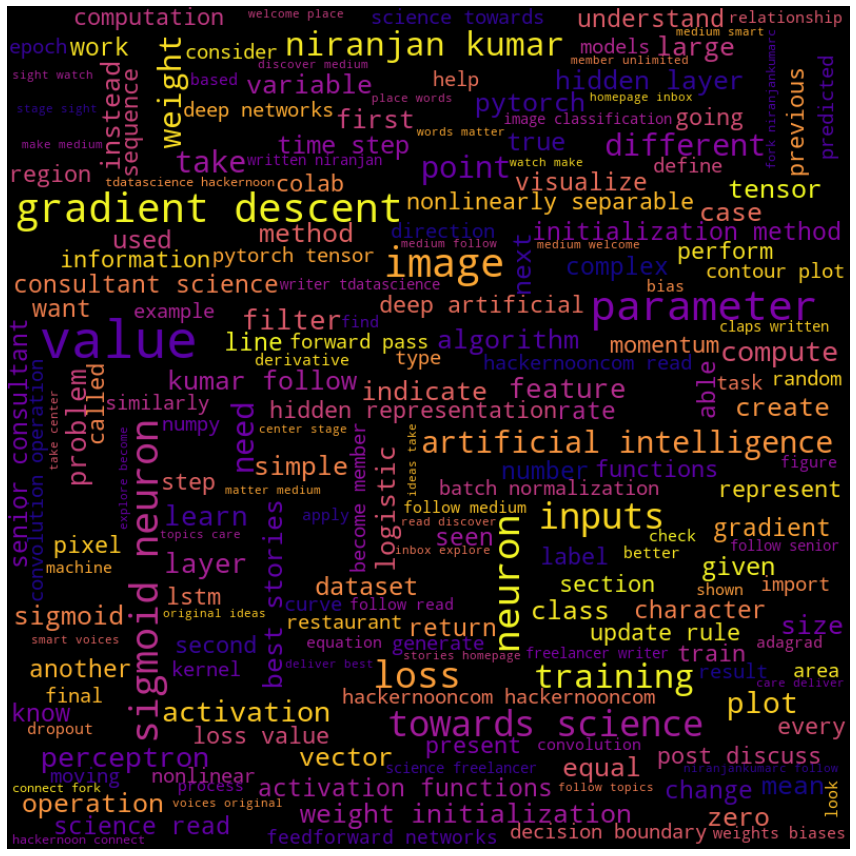

In [43]:
# Create stopword list:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords = stopwords, background_color = "black", colormap="plasma").generate(cleaned_content) 
  
# plot the WordCloud image     
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout()

# store to file
plt.savefig("av_wordcloud.png", dpi=150)
  
plt.show()

## Style Cloud

In [44]:
import stylecloud

In [45]:
#dog wordcloud

stylecloud.gen_stylecloud(text = cleaned_content,
                          icon_name='fas fa-dog',
                          background_color='black',
                          gradient='horizontal', output_name='stylecloud_dog.png')

In [46]:
#can also generate twitter and linkedln wordclouds

stylecloud.gen_stylecloud(text = cleaned_content,
                          icon_name="fab fa-linkedin-in",
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='white',
                          gradient='vertical', output_name='stylecloud_li.png')

In [47]:
#can also generate twitter and linkedln wordclouds

stylecloud.gen_stylecloud(text = cleaned_content,
                          icon_name="fab fa-twitter",
                          palette='colorbrewer.sequential.Blues_9',
                          background_color='black',
                          gradient='vertical', output_name='stylecloud_tw.png')

In [48]:
#can also generate twitter and linkedln wordclouds

stylecloud.gen_stylecloud(text = cleaned_content,
                          icon_name="far fa-smile-beam",
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='vertical', output_name='stylecloud_smile.png')

## Frequent Words
- Frequent Words in the cleaned corpus

In [49]:
plt.style.use("seaborn")

plt.rcParams['figure.figsize'] = 12, 10
sns.set(font_scale=1.2)

In [50]:
#frequent words

counted_words = Counter(main_content_tokens)

In [53]:
most_common_df = pd.DataFrame(counted_words.most_common(10), columns=["words", "count"])
most_common_df.head()

,words,count
0,loss,246
1,neuron,243
2,deep,224
3,gradient,217
4,follow,209


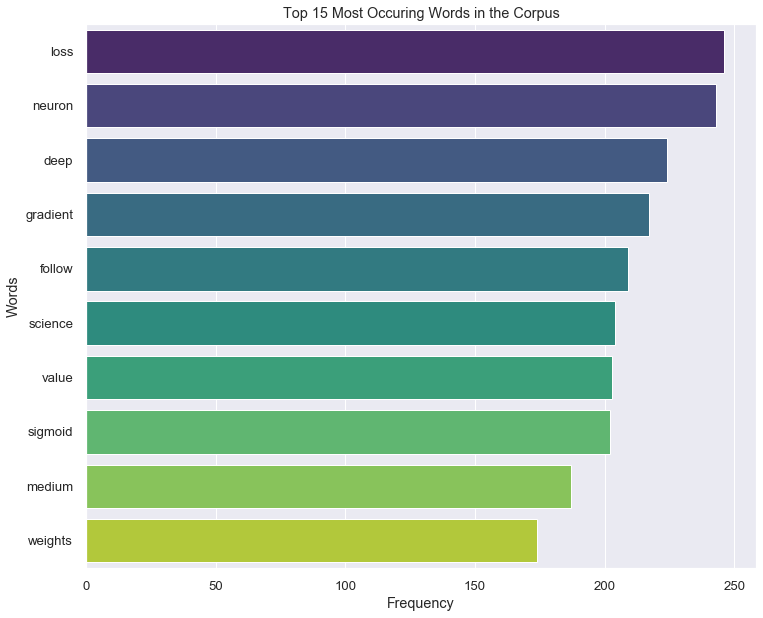

In [54]:
#plot the most common words

sns.barplot(y = "words", x = "count", data = most_common_df, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 15 Most Occuring Words in the Corpus")
plt.show()